In [1]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import mplfinance as mpf
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [77]:
data_df=web.DataReader('036570.KS', 'yahoo', '2020-05-29', '2020-11-05')
data_df=data_df.iloc[-11:,:]
close_10=data_df.iloc[-2,:]['Close']
# max_value=data_df.iloc[-11:-1,:]['High'].max()
# min_value=data_df.iloc[-11:-1,:]['Low'].min()
# data_df=(data_df-min_value)/(max_value-min_value)
data_df=np.log10(data_df/close_10)

data_df.iloc[-1,:] = [-0.015,-0.015,-0.015,-0.015,-0.015,-0.015]

Text(0, 0.5, 'Scaled Price')

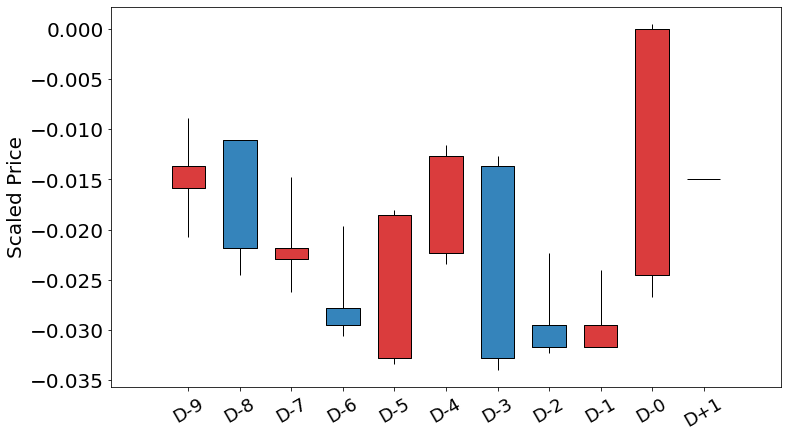

In [78]:
date_lst = ['D-9', 'D-8', 'D-7', 'D-6', 'D-5', 'D-4', 'D-3', 'D-2', 'D-1', 'D-0', 'D+1']
colorset = mpf.make_marketcolors(up='tab:red', down='tab:blue', volume='tab:blue')
s = mpf.make_mpf_style(marketcolors=colorset)
fig, ax = plt.subplots(1,1,figsize=(12,7))
mpf.plot(data_df, type = 'candle',style=s,ax=ax)
ax.set_xticks(range(11))
ax.set_xticklabels(date_lst, fontsize=18, rotation=30)

_=plt.yticks(fontsize=20)
ax.set_ylabel('Scaled Price', fontsize=20)
# ax.set_xlabel('10 days data for predict', fontsize=20)

### 4번 스케일링 플롯

In [88]:
data_df_10_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-22,820000,798000,807000,811000,85163,796102.6875
2020-10-23,816000,791000,816000,796000,80718,781378.1875
2020-10-26,809000,788000,794000,796000,49132,781378.1875
2020-10-27,800000,780000,785000,782000,81633,767635.3750
2020-10-28,803000,775000,776000,802000,78286,787268.0000
2020-10-29,815000,793000,795000,813000,88029,798065.9375
2020-10-30,813000,774000,811000,776000,92285,761745.6250
2020-11-02,795000,777000,782000,778000,48696,763708.8750
2020-11-03,792000,778000,778000,782000,48350,767635.3750


In [89]:
data_df=web.DataReader('036570.KS', 'yahoo', '2020-05-29', '2020-11-05')
data_df_10_df = data_df[-11:]
data_df_10_lst = data_df[-11:].values.tolist()
close_lst = data_df[-12:-1]['Close']

result2 = []
for i,(row, close_value) in enumerate(zip(data_df_10_lst, close_lst)):
    result = []
    for price in row[:4]:
        result += [(price/close_value)-1]
    result2.append( result )

In [90]:
scaled_data_df = pd.DataFrame(result2, columns=['High','Low','Open','Close'])

In [94]:
scaled_data_df.index = data_df_10_df.index
scaled_data_df.iloc[-1,:]=[0,0,0,0]
scaled_data_df

,High,Low,Open,Close
Date,,,,
2020-10-22,0.013597,-0.013597,-0.002472,0.002472
2020-10-23,0.006165,-0.024661,0.006165,-0.018496
2020-10-26,0.016332,-0.010050,-0.002513,0.000000
2020-10-27,0.005025,-0.020101,-0.013819,-0.017588
2020-10-28,0.026854,-0.008951,-0.007673,0.025575
2020-10-29,0.016209,-0.011222,-0.008728,0.013716
2020-10-30,0.000000,-0.047970,-0.002460,-0.045510
2020-11-02,0.024485,0.001289,0.007732,0.002577
2020-11-03,0.017995,0.000000,0.000000,0.005141


Text(0, 0.5, 'Scaled Price')

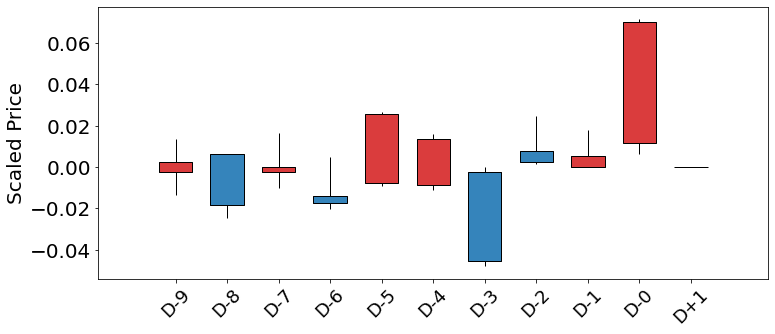

In [95]:
date_lst = ['D-9', 'D-8', 'D-7', 'D-6', 'D-5', 'D-4', 'D-3', 'D-2', 'D-1', 'D-0', 'D+1']
colorset = mpf.make_marketcolors(up='tab:red', down='tab:blue', volume='tab:blue')
s = mpf.make_mpf_style(marketcolors=colorset)
fig, ax = plt.subplots(1,1,figsize=(12,5))
mpf.plot(scaled_data_df, type = 'candle',style=s,ax=ax)
ax.set_xticks(range(11))
ax.set_xticklabels(date_lst, fontsize=18)

_=plt.yticks(fontsize=20)
ax.set_ylabel('Scaled Price', fontsize=20)